# Ford GoBike system data analysis
## by Yongnam Jung

## Investigation Overview

In this investigation, I wanted to look at the characteristics of bike journeys. The main focus is how long they take a trip via bike, and which date customers start their trip.

## Dataset Overview

The data consisted of riding information of approximately 138,251 riders. The attributes included the four riding start/end time, location as well as additional categorical variables such as membership, equaity, and ride type. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('202005-baywheels-tripdata.csv')

In [3]:
# create datetime variable
df_bike["start_time"] = pd.to_datetime(df_bike.started_at)
df_bike["end_time"] = pd.to_datetime(df_bike.ended_at)
# extract day strings from start_time
df_bike['start_day'] = df_bike.start_time.dt.strftime("%A")
df_bike['diff_time'] = df_bike['end_time'] - df_bike['start_time']
df_bike['diff_days']=df_bike['diff_time']/np.timedelta64(1,'D')
df_bike['diff_hours'] = df_bike['diff_days']*24
# Extract date from start_time and end_time
df_bike['start_j_date'] = df_bike['start_time'].dt.date
df_bike['end_j_date'] = df_bike['end_time'].dt.date
df_bike['start_date1'] =  pd.to_datetime(df_bike['start_time'], format='%Y-%m-%d')
df_bike['day'] = df_bike['start_date1'].apply(lambda r:r.day).astype(int)
df_bike['month'] = df_bike['start_date1'].apply(lambda r:r.month).astype(int)
df_bike['diff_hours'] = df_bike.diff_hours.astype(int)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Counts and Start day

Customers took a ride more during weekends than weekdays. The most frequent start date is Saturday.

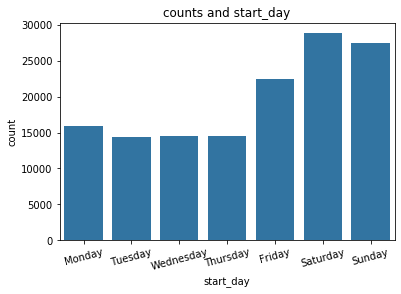

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike, x='start_day',color=base_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("counts and start_day")
plt.xticks(rotation=15);

## Counts and Start day by membership

The number of casual customers is larger than the number of membership cusomter, and this trend is similar on each start day.

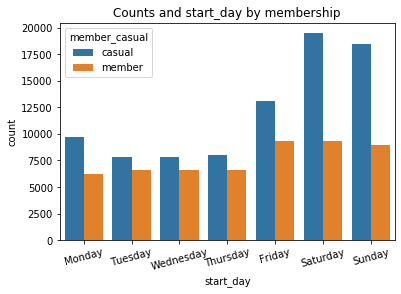

In [8]:
sb.countplot(data = df_bike, x='start_day', hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Counts and start_day by membership")
plt.xticks(rotation=15);

## Time Duration by Day

The plot of the full data using a bar plot shows that time duration of bike journey has peoriodic pattern, but decreasing over time. As time goes by, time duration varations had decreased.


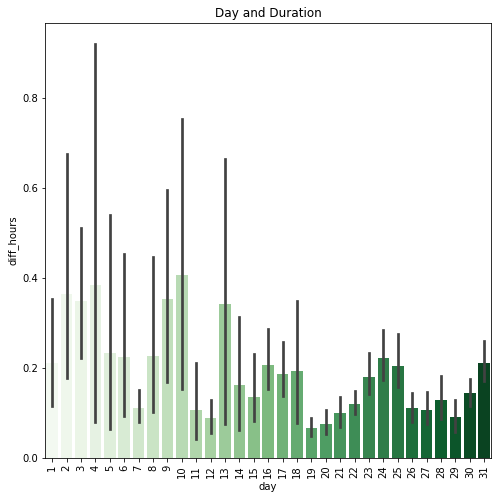

In [5]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])
sb.barplot(data = df_bike, x = 'day', y = 'diff_hours', palette = 'Greens')
plt.xticks(rotation=90)
plt.title("Day and Duration")
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!